In [1]:
#modules nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#ouverture de la data
my_data = pd.read_csv('boston_house_prices.csv') 
my_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
#normalisation des données
my_data = (my_data - my_data.mean())/my_data.std()
my_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499,0.159528
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953,-0.101424
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532,1.322937
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171,1.181589
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487,1.486032


In [3]:
#def des differents éléments

X = my_data.iloc[:,0:2]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

#convertir valeurs de panda
y = my_data.iloc[:,2:3].values 
theta = np.zeros([1,3])

alpha = 0.01
iters = 1000

In [4]:
#cout
def computeCost(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))

In [5]:
#Algorithme du gradient
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = computeCost(X, y, theta)
    
    return theta,cost

#calcul gradient cout
g,cost = gradientDescent(X,y,theta,iters,alpha)
print(g)

finalCost = computeCost(X,y,g)
print(finalCost)

[[-3.09352895e-15  3.12134461e-01 -4.71230997e-01]]
0.3101505481743738


Text(0.5, 1.0, 'erreur entrainement')

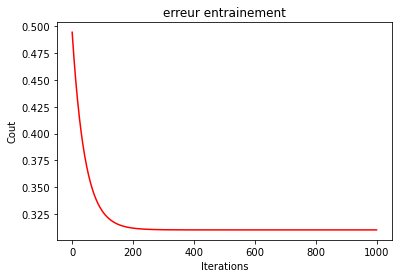

In [7]:
#graphique
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cout')  
ax.set_title('erreur entrainement')  

# verification avec scikit-learn

In [8]:
#import de scikit-learn
from sklearn.metrics import mean_squared_error

In [9]:
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true, y_pred)

0.375